In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

# Load the wine_clust dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

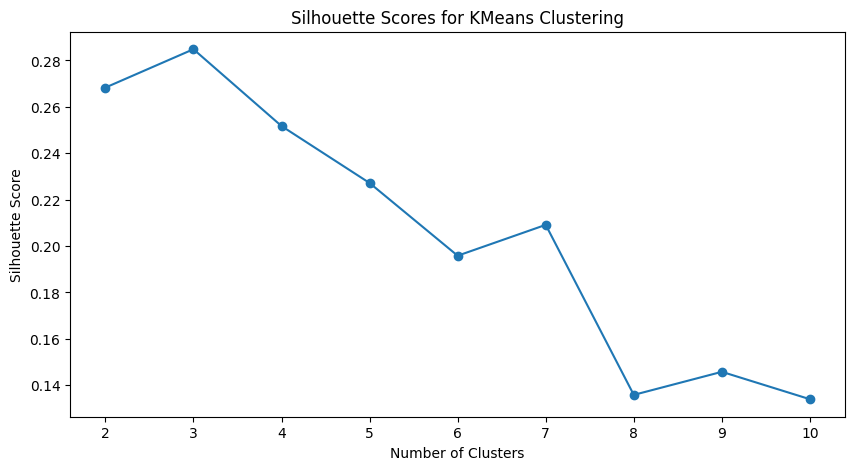

Optimal number of clusters for KMeans: 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Find the optimum number of clusters for KMeans using silhouette score
silhouette_scores_kmeans = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores_kmeans.append(silhouette_avg)

# Plot the silhouette scores for KMeans
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimum number of clusters for KMeans
optimal_kmeans_clusters = np.argmax(silhouette_scores_kmeans) + 2
print("Optimal number of clusters for KMeans:", optimal_kmeans_clusters)

# Create the KMeans model with the optimum number of clusters
kmeans_model = KMeans(n_clusters=optimal_kmeans_clusters, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

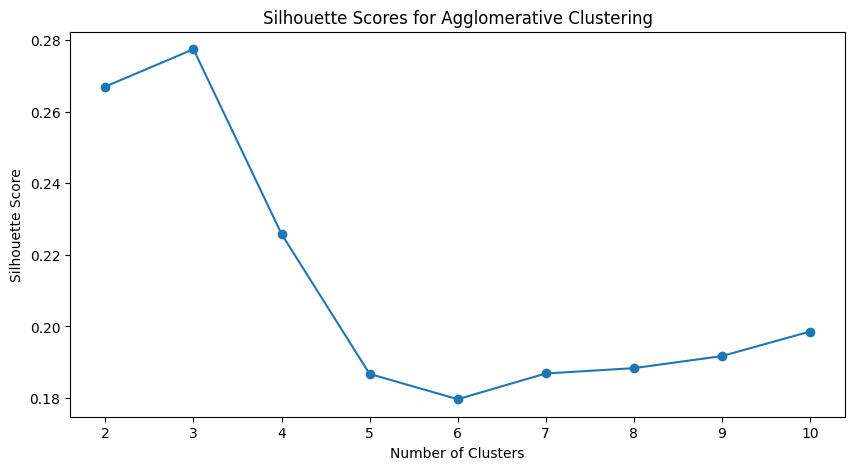

Optimal number of clusters for Agglomerative Clustering: 3


In [ ]:
# Find the optimum number of clusters for Agglomerative Clustering using silhouette score
silhouette_scores_agg = []

for n_clusters in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores_agg.append(silhouette_avg)

# Plot the silhouette scores for Agglomerative Clustering
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_agg, marker='o')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimum number of clusters for Agglomerative Clustering
optimal_agg_clusters = np.argmax(silhouette_scores_agg) + 2
print("Optimal number of clusters for Agglomerative Clustering:", optimal_agg_clusters)

# Create the Agglomerative Clustering model with the optimum number of clusters
agg_model = AgglomerativeClustering(n_clusters=optimal_agg_clusters)
agg_labels = agg_model.fit_predict(X_scaled)


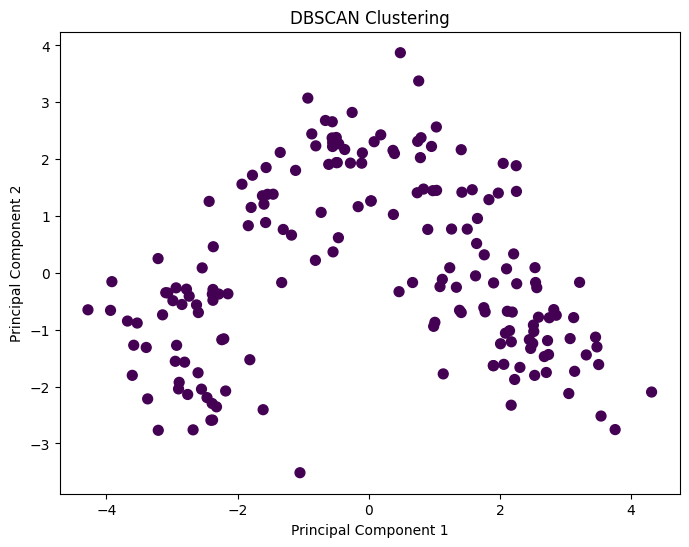

In [ ]:
# Implement DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
